In [1]:
import pandas as pd

C:\Users\sahil singh\AppData\Local\Temp\ipykernel_11300\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('data\Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
median_value = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_value, inplace=True)
most_frequent_category = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(most_frequent_category, inplace=True)

C:\Users\sahil singh\AppData\Local\Temp\ipykernel_11300\1832220462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(median_value, inplace=True)
C:\Users\sahil singh\AppData\Local\Temp\ipykernel_11300\1832220462.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [6]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [7]:
df=df.drop(labels='Item_Identifier', axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [9]:
df.duplicated().sum()

0

In [10]:
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [11]:
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [12]:
categorical_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [13]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [14]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [16]:
df[categorical_columns].describe()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,5203,3350,5577


In [17]:
df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [18]:
## here we can see that only two categories are there low fat Low Fat and LF are same and Regular and reg are same 
## so let's make them common 

In [19]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('LF','Low_Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('low fat','Low_Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('Low Fat','Low_Fat')

df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace('reg','Regular')

In [20]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low_Fat    5517
Regular    3006
Name: count, dtype: int64

In [21]:
df['Item_Type']=df['Item_Type'].str.replace(' ','_')
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace(' ','_')
df['Outlet_Type']=df['Outlet_Type'].str.replace(' ','_')
df['Outlet_Location_Type']=df['Outlet_Location_Type'].str.replace(' ','_')

In [22]:
import seaborn as sns

In [23]:
import matplotlib.pyplot as plt

In [26]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier_1,Supermarket_Type1,3735.1380
1,5.92,Regular,0.019278,Soft_Drinks,48.2692,OUT018,2009,Medium,Tier_3,Supermarket_Type2,443.4228
2,17.50,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier_1,Supermarket_Type1,2097.2700
3,19.20,Regular,0.000000,Fruits_and_Vegetables,182.0950,OUT010,1998,Medium,Tier_3,Grocery_Store,732.3800
4,8.93,Low_Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier_3,Supermarket_Type1,994.7052


In [27]:
## now we will see the info of numerical columns 
df[numerical_columns].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

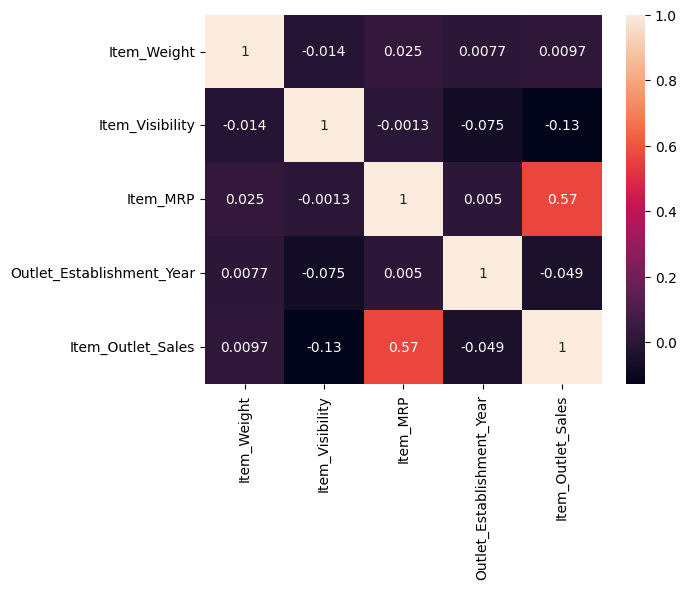

In [28]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

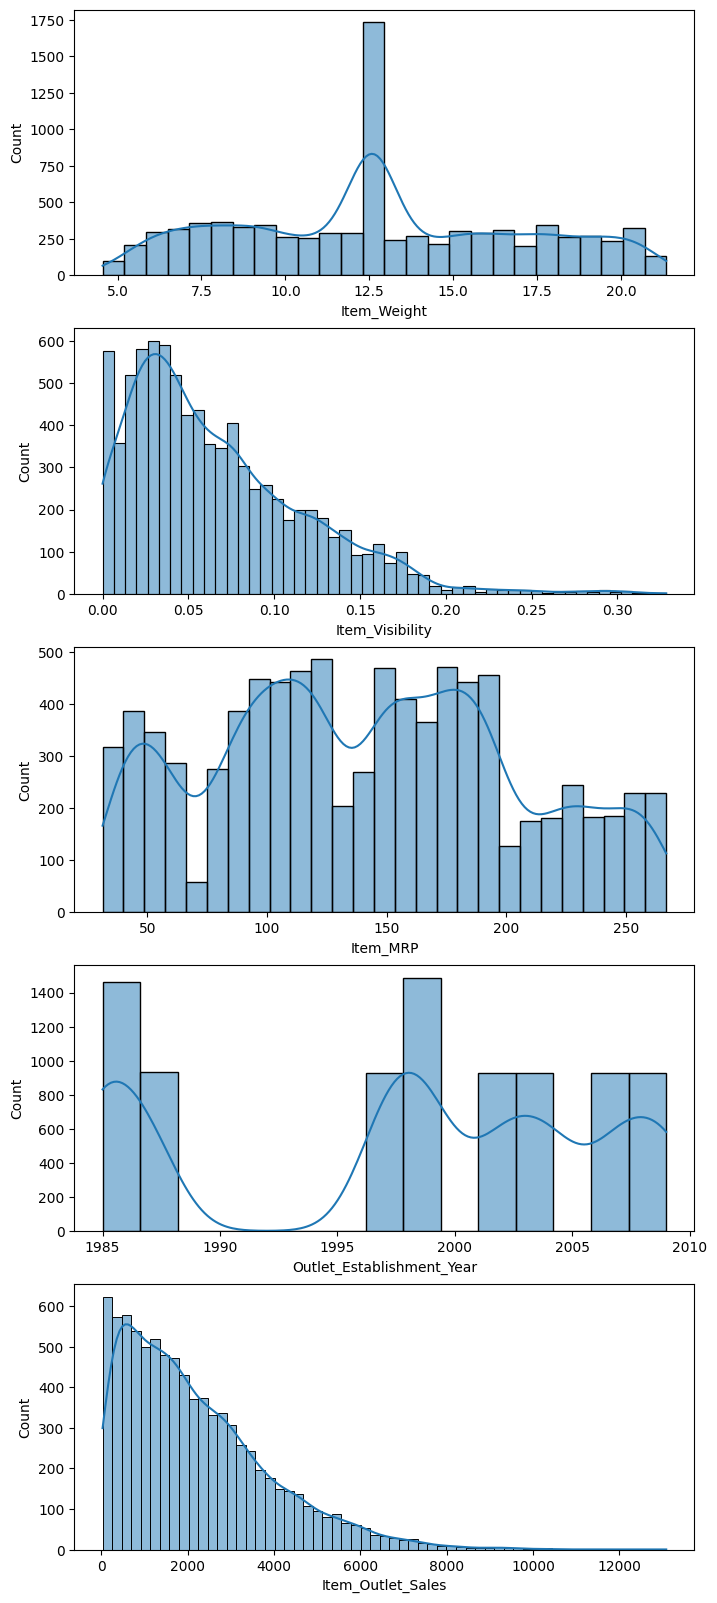

In [29]:
plt.figure(figsize=(8,20))



for i in range(len(numerical_columns)):
    plt.subplot(5,1,i+1)


    sns.histplot(df,x=numerical_columns[i],kde=True)
    
    

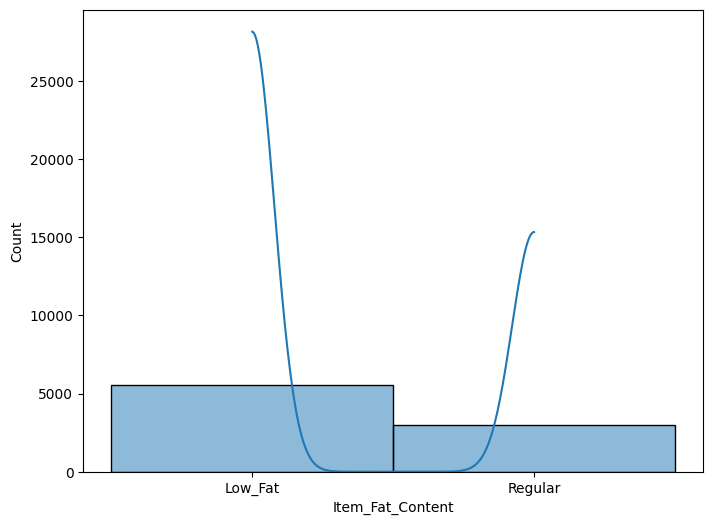

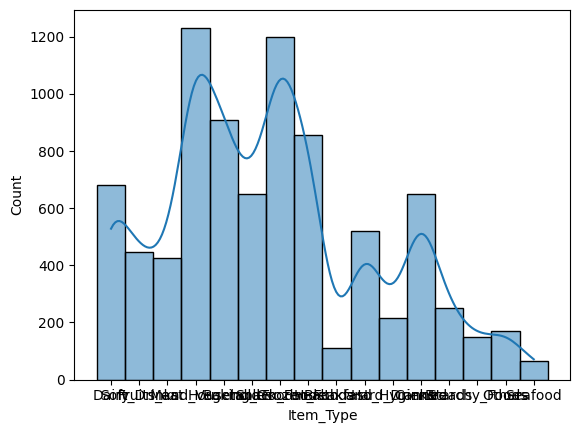

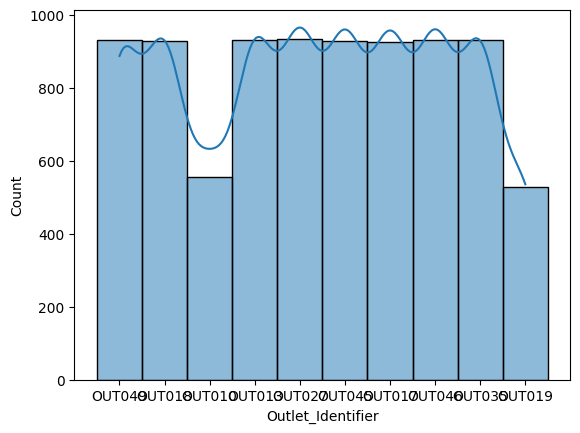

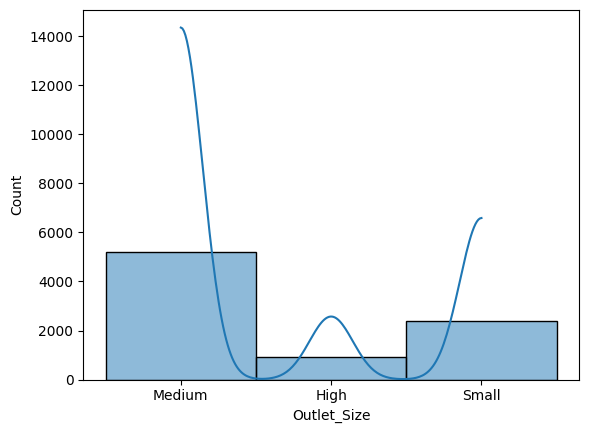

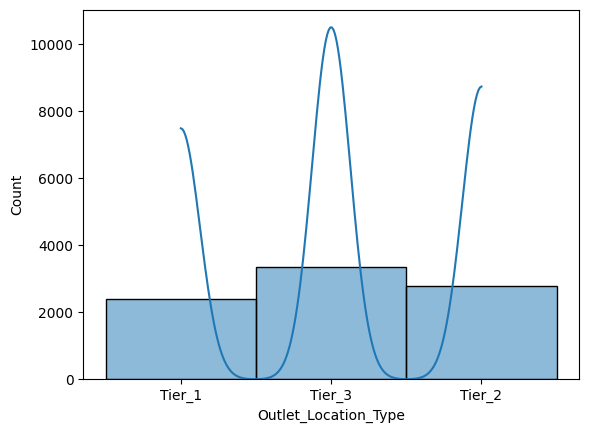

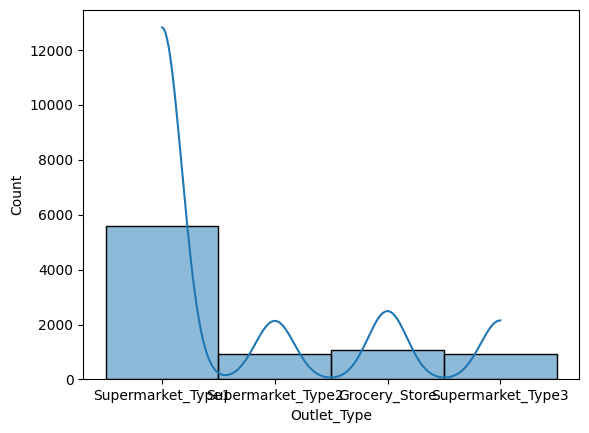

In [30]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [31]:
df.to_csv('New_Train.csv',index=False,header=True)

In [32]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low_Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier_1,Supermarket_Type1,3735.1380
1,5.920,Regular,0.019278,Soft_Drinks,48.2692,OUT018,2009,Medium,Tier_3,Supermarket_Type2,443.4228
2,17.500,Low_Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier_1,Supermarket_Type1,2097.2700
3,19.200,Regular,0.000000,Fruits_and_Vegetables,182.0950,OUT010,1998,Medium,Tier_3,Grocery_Store,732.3800
4,8.930,Low_Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier_3,Supermarket_Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low_Fat,0.056783,Snack_Foods,214.5218,OUT013,1987,High,Tier_3,Supermarket_Type1,2778.3834
8519,8.380,Regular,0.046982,Baking_Goods,108.1570,OUT045,2002,Medium,Tier_2,Supermarket_Type1,549.2850
8520,10.600,Low_Fat,0.035186,Health_and_Hygiene,85.1224,OUT035,2004,Small,Tier_2,Supermarket_Type1,1193.1136
8521,7.210,Regular,0.145221,Snack_Foods,103.1332,OUT018,2009,Medium,Tier_3,Supermarket_Type2,1845.5976
